# A Logistic Regression Approach To Identifying High-Risk Loan Applicants.

## Objective

To develop a predictive model for credit risk assessment using logistic regression by analyzing borrower financial and demographic data, to identify whether a loan applicant is likely to default on their loan to support more informed lending decisions and minimize financial losses associated with credit defaults.

In [113]:
# Import relevent modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load and preview the data.

In [114]:
# Load and preview the data
credit_data = pd.read_csv('credit_risk_dataset.csv')
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [115]:
credit_data.info()             # To show the number of row, columns and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [116]:
# Cheking for missing values
credit_data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Data cleaning and preprocessing

In [117]:
# Drop rows with missing values
credit_data_cleaned = credit_data.dropna()
credit_data_cleaned.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [118]:
credit_data_cleaned.info()          # To show number of columns, rows & data type after dropping some row

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


### Encoding categorical data

In [119]:
# List of categorical columns
categorical_columns = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

# One-hot encode the categorical variables
credit_data_encoded = pd.get_dummies(credit_data_cleaned, columns=categorical_columns, drop_first=True)
credit_data_encoded= credit_data_encoded.astype(int)
credit_data_encoded.head(10)                               # This is the dataframe we will be working with


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123,35000,16,1,0,3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,21,9600,5,1000,11,0,0,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,25,9600,1,5500,12,1,0,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,23,65500,4,35000,15,1,0,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,24,54400,8,35000,14,1,0,4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
5,21,9900,2,2500,7,1,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6,26,77100,8,35000,12,1,0,3,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
7,24,78956,5,35000,11,1,0,4,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
8,24,83000,8,35000,8,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
9,21,10000,6,1600,14,1,0,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


## Identify the independent and dependent variables.

In [120]:
# Independent variables (predictors)
X = credit_data_encoded.drop(columns = 'loan_status')

# Dependent variable (target)
y = credit_data_encoded['loan_status']

# Check how many non-defaults and defaults there are
print(credit_data_encoded['loan_status'].value_counts())      

# Therefore,in the 'loan_status' column:
# 0 = non-default (loan paid or low risk)
# 1 = default (loan not paid or high risk)

loan_status
0    22435
1     6203
Name: count, dtype: int64


## Split the data into training and test set

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25, random_state = 42)

# Scaling the data 

In [122]:
# Scaling the data using standardization and fit only on training data & transform both
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating the regression model

In [123]:
# Create the model
credit_model = LogisticRegression()

# Fit the model
credit_model.fit(X_train_scaled, y_train)

# Make prediction on the test data
y_pred = credit_model.predict(X_test_scaled)

# Predictions
y_pred[0:20]


array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

## Measuring model performance

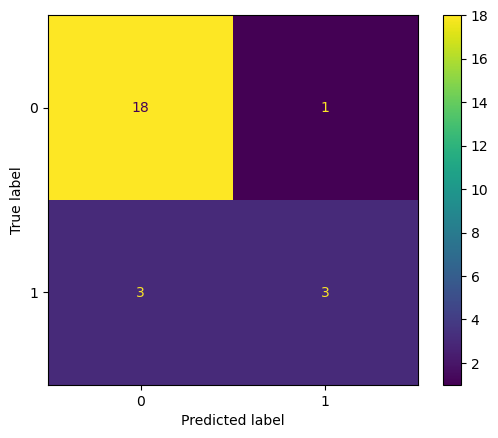

In [124]:
# Evaluating the model performance using a confusion matrix
# Create confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the matrix 
disp_conf_matrix = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = credit_model.classes_)
disp_conf_matrix.plot()

### Model evaluation

In [125]:
# Recording the values obtained by the confusion matrix

TN = 18      # True positive (19 non-defaulter correctly identified)
FN = 3       # False negative (4 defaulters missed by the model)
FP = 1       # False possitive (0 non-defaulters wrongly predicted as dafauters)
TP = 3       # True positive (2 defaulters were correctly identified)
TO = 25      # Total observations (TN + FN + FP + TP)

# Computing the model accuracy, precision and recall using sciki-learn.
accuracy = accuracy_score(y_test, y_pred)        # how often the model is right
precision = precision_score(y_test, y_pred)      # When the model predicts defaults, how often is it correct?
recall = recall_score(y_test, y_pred)            # Of all actual defaults, how many did the model catch?
f1 = f1_score(y_test, y_pred)                    # Harmonic mean of precision and recall

print(f'accuracy: {accuracy:.2f}')
print(f'precision: {precision:.2f}')
print(f'recall: {recall:.2f}')
print(f'f1: {f1:.2f}')


accuracy: 0.84
precision: 0.75
recall: 0.50
f1: 0.60


### Interpretation of confusion matrix results

**Accuracy** is 84% which seems high, but can be misleading if defaults are rare (which they are most likely to be in credit datasets).
**Precision** is a good 75% which means when the model predicts positive class (defaulters), it's correct 75% of the time, so false positive are relatively low. It could be useful when false positives are costly, especially in credit risk, fraud detection etc.
**Recall** is 50% meaning the model identifies only half of the actual defaults, the actual positive cases. It's missing a lot of true positives (the false negatives). This could be problematic in cases where missing positives (defaulters) is costly (e.g.credit risk).
F1 score is moderate 60% indicating that the balance between precision and recall is not strong. This suggests that the model is struggling with recall more than precision.


In credit risk modeling, missing a default (false negative) can be very costly — way more than falsely flagging a non-default. The model is more censervative- predicts defaults when it is more confident, but in doing so, it also misses half of real defaulters- which is a lot in credit risk. It may be great in some use cases, but very dangerous in credit risk as you would assume the goal is to catch as many defaulter as possible.